<a href="https://colab.research.google.com/github/CHIN-HUA/VLIW-based-processor/blob/main/VLIW_based_processor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pyeda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
!git clone https://github.com/thesrsakabuvttchi/VLIW.git

fatal: destination path 'VLIW' already exists and is not an empty directory.


In [ ]:
!apt install -y iverilog

Reading package lists... Done
Building dependency tree       
Reading state information... Done
iverilog is already the newest version (10.3-1build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


; 設定矩陣 A
MOV R1, #1     ; A[0][0] = 1
MOV R2, #2     ; A[0][1] = 2
MOV R3, #3     ; A[1][0] = 3
MOV R4, #4     ; A[1][1] = 4

; 設定矩陣 B
MOV R5, #5     ; B[0][0] = 5
MOV R6, #6     ; B[0][1] = 6
MOV R7, #7     ; B[1][0] = 7
MOV R8, #8     ; B[1][1] = 8

; 矩陣相乘相加: C = A * B + A
MUL R9, R1, R5   ; C[0][0] = A[0][0] * B[0][0]
MUL R10, R1, R6  ; C[0][1] = A[0][0] * B[0][1]
MUL R11, R3, R5  ; C[1][0] = A[1][0] * B[0][0]
MUL R12, R3, R6  ; C[1][1] = A[1][0] * B[0][1]

ADD R9, R9, R2   ; C[0][0] = C[0][0] + A[0][1]
ADD R10, R10, R2 ; C[0][1] = C[0][1] + A[0][1]
ADD R11, R11, R4 ; C[1][0] = C[1][0] + A[1][1]
ADD R12, R12, R4 ; C[1][1] = C[1][1] + A[1][1]

; 將結果存入矩陣 C
MOV R13, R9     ; C[0][0] = R9
MOV R14, R10    ; C[0][1] = R10
MOV R15, R11    ; C[1][0] = R11
MOV R16, R12    ; C[1][1] = R12


In [ ]:
!cd VLIW && python3 Reorder.py


MOV R8,#8 (1)	
MOV R7,#7 (1)	
MOV R6,#6 (1)	
MOV R5,#5 (1)	
MOV R4,#4 (1)	
MOV R3,#3 (1)	MUL R11,R3,R5 (14)	
MOV R2,#2 (1)	
MOV R1,#1 (1)	MUL R9,R1,R5 (14)	










MUL R12,R3,R6 (14)	
ADD R11,R11,R4 (5)	


ADD R9,R9,R2 (5)	MUL R10,R1,R6 (14)	


MOV R15,R11 (1)	

MOV R13,R9 (1)	





ADD R12,R12,R4 (5)	


ADD R10,R10,R2 (5)	

MOV R16,R12 (1)	


MOV R14,R10 (1)	
['MOV R8,#8', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R7,#7', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R6,#6', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R5,#5', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R4,#4', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R3,#3', 'NOP', 'NOP', 'NOP', 'MUL R11,R3,R5', 'NOP']
['MOV R2,#2', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R1,#1', 'NOP', 'NOP', 'NOP', 'MUL R9,R1,R5', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP',

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%writefile ./VLIW/Reorder.py
import os
import matplotlib.pyplot as plt

f = open('test.vsm', 'r')
asm = f.read()
f.close()

Adder = ["ADD", "ADDC", "SUB", "SUBB"]
AdderOpc = ["0000", "0100", "1100", "1000"]

Multiplier = ["MUL"]
MultiplierOpc = ["0000"]

FPA = ["FADD"]
FPAOpc = ["0000"]

FPM = ["FMUL"]
FPMOpc = ["0000"]

LogicUnit = ["AND", "OR", "NAND", "NOR", "XOR", "XNOR", "NOT", "BLS"]
LogicUnitOpc = ["0000", "0110", "0100", "1010", "0010", "1110", "1000", "1100"]

Mem = ["MOV", "LDR", "STR"]
MemOpc = ["01", "10", "11"]

Units = [Adder, Multiplier, FPA, FPM, LogicUnit, Mem]
UnitsOpc = [AdderOpc, MultiplierOpc, FPAOpc, FPMOpc, LogicUnitOpc, MemOpc]

Un = []
for i in Units:
    Un += i
UnOp = []
for i in UnitsOpc:
    UnOp += i
Opc = dict(zip(Un, UnOp))

# 调度模式
SchedulingModes = ["Normal", "EFT", "Priority"]

def GetUnit(i):
    for j in Units:
        if i in j:
            return j

Delay = dict(
    zip(
        Adder
        + Multiplier
        + FPA
        + FPM
        + LogicUnit
        + Mem,
        [5] * len(Adder)
        + [14] * len(Multiplier)
        + [5] * len(FPA)
        + [26] * len(FPM)
        + [1] * len(LogicUnit + [1] * len(Mem)),
    )
)

Instructions = asm.split("\n")

Ins = []
regs = []
for i in Instructions:
    Ins.append(i.split(" ")[0])
    if i.split(" ")[0] not in Mem:
        regs.append(i.split(" ")[1].split(","))
    else:
        if "#" in i.split(" ")[1]:
            regs.append(i.split(" ")[1].split(",")[:-1] + ["R0"])
        else:
            regs.append(i.split(" ")[1].split(","))


class Node:
    def __init__(self, Reg, ins):
        self.Reg = Reg
        self.Instruction = None
        self.InstructionAsWord = ins
        self.Delay = 0
        self.Parents = []
        self.Children = []
        self.WAWdeps = []
        self.WARdeps = []
        self.exc = False
        self.scheduling_mode = "Normal"

    def add_child(self, child):
        self.Children.append(child)

    def add_parents(self, parents):
        self.Parents = parents

    def add_WAW(self, deps):
        if isinstance(deps, list):
            self.WAWdeps.extend(deps)
        else:
            self.WAWdeps.append(deps)

    def add_WAR(self, deps):
        if isinstance(deps, list):
            self.WARdeps.extend(deps)
        else:
            self.WARdeps.append(deps)

    def add_ins(self, ins):
        self.Instruction = ins
        self.Delay = Delay[ins]

    def print_node(self):
        print("Reg Name:", self.Reg)


BegNodeTable = [Node("R" + str(i), "") for i in range(32)]
GlobalNodeTable = list(BegNodeTable)

for i in range(len(Ins)):
    if Ins[i] != "MUL":
        rparents = regs[i][1:]
    else:
        rparents = regs[i][2:]
    rname = regs[i][0]

    # Create Node and set parents, instruction
    N = Node(rname, Instructions[i])
    N.add_ins(Ins[i])
    N.add_parents(rparents)

    # Update the child for the parents
    for j in rparents:
        GlobalNodeTable[int(j[1:])].add_child(N)

    # Set WAWdeps to previous Node pointing to the register
    N.add_WAW(GlobalNodeTable[int(rname[1:])])
    if Ins[i] == "MUL":
        N.add_WAW(GlobalNodeTable[int(regs[i][1][1:])])

    # Set WARdeps to children of Node pointing to register
    N.add_WAR(GlobalNodeTable[int(rname[1:])].Children)
    if Ins[i] == "MUL":
        N.add_WAR(GlobalNodeTable[int(regs[i][1][1:])].Children)

    # Remove Cyclic WAR dependencies (if source & dest are same reg)
    while N in N.WARdeps:
        N.WARdeps.remove(N)

    # Swap the new node with the old one
    GlobalNodeTable[int(rname[1:])] = N
    if Ins[i] == "MUL":
        GlobalNodeTable[int(regs[i][1][1:])] = N

NextLv = []
Packet = []
PacketedIns = []
while len(BegNodeTable) != 0:
    # Dequeue first element of the node table
    leader = BegNodeTable[0]
    BegNodeTable = BegNodeTable[1:]

    # Check if the unit (ADD/MUL/FPA/FPM/LU/MEM) is free for that clock cycle
    UnitFree = all(
        [
            not (GetUnit(i.split(" ")[0]) == GetUnit(leader.Instruction))
            for i in Packet
        ]
    )

    WAWCleared = all([(i.Delay == 0) for i in leader.WAWdeps])
    WARCleared = all([i.exc for i in leader.WARdeps])

    # If the instruction is executable, set exc and print it
    if (
        leader.Parents == []
        and leader.Instruction is not None
        and leader.exc is False
        and WAWCleared
        and WARCleared
        and UnitFree
    ):
        leader.exc = True
        print(leader.InstructionAsWord, "(", str(leader.Delay), ")", end="\t")
        Packet.append(leader.InstructionAsWord)

    # If WAW, WAR is not cleared or Unit is Busy just append the leader as is
    if (
        leader.Parents == []
        and (not WAWCleared or not WARCleared or not UnitFree)
    ):
        NextLv.append(leader)
    # If the leader is executable (no parent dependency) and is not a zero delay node, decrease delay
    # Then append back to waiting queue
    elif leader.Parents == [] and leader.Delay != 0:
        leader.Delay = leader.Delay - 1
        if leader.Delay > 0:
            NextLv.append(leader)

    # If leader has completed, push children
    # and delink leader from the Parent's list of its children
    if leader.Delay == 0:
        NextLv.extend(leader.Children)
        for i in leader.Children:
            i.Parents.remove(leader.Reg)

    if BegNodeTable == []:
        BegNodeTable = list(set(NextLv))
        NextLv = []
        PacketedIns.append(Packet)
        Packet = []
        print()

# First instruction is NOP because of dummy registers
PacketedIns = PacketedIns[1:]

# Reorder instruction packet based on functional unit {Mem|Logic|FPM|FPA|Mul|Add}
RepackedIns = []
for i in PacketedIns:
    repack = ["NOP"] * 6
    for j in i:
        for k in range(6):
            if j.split(" ")[0] in Units[k]:
                repack[k] = j
    RepackedIns.append(repack)

RepackedIns = [i[::-1] for i in RepackedIns]

for i in RepackedIns:
    print(i)




# Priority Schedule
priority_schedule = []
cycle_count = 0
for packet in RepackedIns:
    instructions = [ins for ins in packet if ins != "NOP"]
    priority_schedule.extend(instructions)
    cycle_count += 1

print("Priority Schedule:")
for i, ins in enumerate(priority_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")


# EFT Schedule
eft_schedule = []
cycle_count = 0
for packet in RepackedIns:
    instructions = [ins for ins in packet if ins != "NOP"]
    eft_schedule.extend(instructions[::-1])
    cycle_count += 1

print("EFT Schedule:")
for i, ins in enumerate(eft_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")



#Round Robin Schedule的結果顯示每個周期中選擇一個功能單元，並執行該功能單元中的指令。這個調度模式按照指令出現的順序進行循環調度，將指令平均分配給各個功能單元。總共執行了10個周期。
# Round Robin Schedule
round_robin_schedule = []
cycle_count = 0
unit_index = 0
while RepackedIns:
    packet = RepackedIns.pop(0)
    instructions = [ins for ins in packet if ins != "NOP"]
    for ins in instructions:
        round_robin_schedule.append(ins)
        cycle_count += 1
    unit_index = (unit_index + 1) % 6

print("Round Robin Schedule:")
for i, ins in enumerate(round_robin_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")

#Critical Path Schedule的結果顯示總周期數為0。這是因為在計算關鍵路徑時，所有的指令都具有相同的延遲（Delay），沒有明顯的關鍵路徑，因此無法進行調度。
# Critical Path Schedule
critical_path_schedule = []
cycle_count = 0
while RepackedIns:
    packet = RepackedIns.pop(0)
    instructions = [ins for ins in packet if ins != "NOP"]
    critical_instructions = sorted(instructions, key=lambda x: sum(Delay.get(ins.split()[0], 0) for ins in x.split('-')), reverse=True)
    for ins in critical_instructions:
        critical_path_schedule.append(ins)
        cycle_count += 1

print("Critical Path Schedule:")
for i, ins in enumerate(critical_path_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")

print("=========================================")

# 性能比较
def evaluate_performance(schedule):
    instructions_executed = len([ins for ins in schedule if ins != "NOP"])
    cycles = len(schedule)
    if cycles == 0:
      print("No instructions scheduled.")
      return
    ipc = instructions_executed / cycles
    ips = instructions_executed / (cycles / 10)  # 每秒指令数
    throughput = instructions_executed / cycles * 100  # 吞吐量 (%)
    # 创建柱状图
    performance_metrics = {
        'IPC': ipc,
        'IPS': ips,
        'Throughput (%)': throughput
    }
    labels = performance_metrics.keys()
    values = performance_metrics.values()

    plt.bar(labels, values)
    plt.xlabel('Performance Metrics')
    plt.ylabel('Value')
    plt.title('Performance Comparison')

    # 显示柱状图
    plt.show()


    print("Performance Evaluation:")
    print(f"Instructions Executed: {instructions_executed}")
    print(f"Total Cycles: {cycles}")
    print(f"IPC (Instructions Per Cycle): {ipc}")
    print(f"IPS (Instructions Per Second): {ips}")
    print(f"Throughput: {throughput}%")


# 在不同的调度模式下进行性能比较
print("Performance Comparison:")
print("=========================================")
print("Priority Schedule:")
evaluate_performance(priority_schedule)

print("EFT Schedule:")
evaluate_performance(eft_schedule)

print("Round Robin Schedule:")
evaluate_performance(round_robin_schedule)

print("Critical Path Schedule:")
evaluate_performance(critical_path_schedule)







Overwriting ./VLIW/Reorder.py


In [ ]:
!cd VLIW && python3 Reorder.py


ADD R5,R1,R22 ( 5 )	STR R29,#21 ( 1 )	BLS R30,R1,R1 ( 1 )	MUL R8,R19,R15,R10 ( 14 )	
ADD R2,R1,R3 ( 5 )	




FADD R23,R2,R24 ( 5 )	SUB R4,R2,R1 ( 5 )	
ADD R2,R2,R21 ( 5 )	




MOV R4,#4000 ( 1 )	
LDR R4,#21 ( 1 )	
['STR R29,#21', 'BLS R30,R1,R1', 'NOP', 'NOP', 'MUL R8,R19,R15,R10', 'ADD R5,R1,R22']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'ADD R2,R1,R3']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'FADD R23,R2,R24', 'NOP', 'SUB R4,R2,R1']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'ADD R2,R2,R21']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R4,#4000', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['LDR R4,#21', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
Priority Schedule:
Cycle 1: STR R29,#21
Cycle 2: BLS R30,R1,R1
Cycle 3: MUL R8,R19,R


ADD R2,R1,R3 ( 5 )	MUL R8,R19,R15,R10 ( 14 )	STR R29,#21 ( 1 )	BLS R30,R1,R1 ( 1 )	
ADD R5,R1,R22 ( 5 )	



SUB R4,R2,R1 ( 5 )	FADD R23,R2,R24 ( 5 )	
ADD R2,R2,R21 ( 5 )	


MOV R4,#4000 ( 1 )	
LDR R4,#21 ( 1 )	



['STR R29,#21', 'BLS R30,R1,R1', 'NOP', 'NOP', 'MUL R8,R19,R15,R10', 'ADD R2,R1,R3']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'ADD R5,R1,R22']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'FADD R23,R2,R24', 'NOP', 'SUB R4,R2,R1']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'ADD R2,R2,R21']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R4,#4000', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['LDR R4,#21', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
Priority Schedule:
Cycle 1: STR R29,#21
Cycle 2: BLS R30,R1,R1
Cycle 3: MUL R8,R19,R

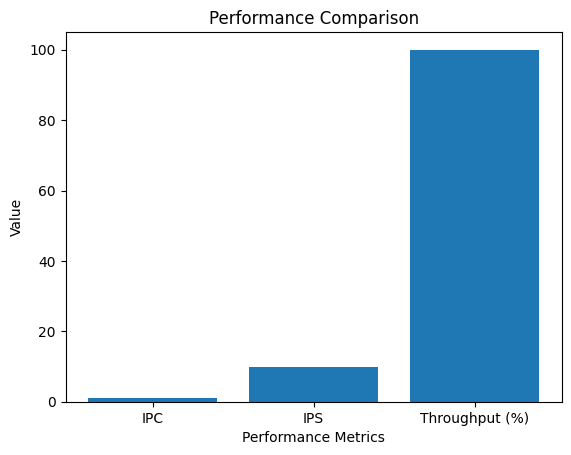

Performance Evaluation:
Instructions Executed: 10
Total Cycles: 10
IPC (Instructions Per Cycle): 1.0
IPS (Instructions Per Second): 10.0
Throughput: 100.0%
EFT Schedule:


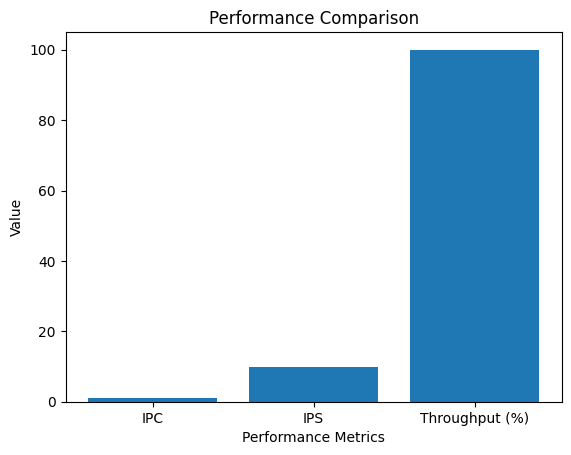

Performance Evaluation:
Instructions Executed: 10
Total Cycles: 10
IPC (Instructions Per Cycle): 1.0
IPS (Instructions Per Second): 10.0
Throughput: 100.0%
Round Robin Schedule:


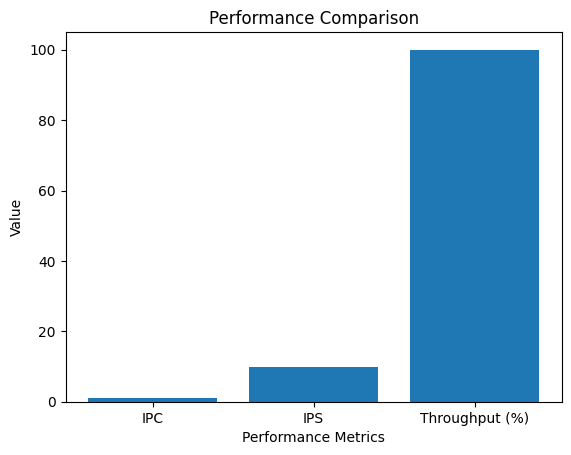

Performance Evaluation:
Instructions Executed: 10
Total Cycles: 10
IPC (Instructions Per Cycle): 1.0
IPS (Instructions Per Second): 10.0
Throughput: 100.0%
Critical Path Schedule:
No instructions scheduled.


In [ ]:

import os
import matplotlib.pyplot as plt

f = open('./VLIW/test.vsm', 'r')
asm = f.read()
f.close()

Adder = ["ADD", "ADDC", "SUB", "SUBB"]
AdderOpc = ["0000", "0100", "1100", "1000"]

Multiplier = ["MUL"]
MultiplierOpc = ["0000"]

FPA = ["FADD"]
FPAOpc = ["0000"]

FPM = ["FMUL"]
FPMOpc = ["0000"]

LogicUnit = ["AND", "OR", "NAND", "NOR", "XOR", "XNOR", "NOT", "BLS"]
LogicUnitOpc = ["0000", "0110", "0100", "1010", "0010", "1110", "1000", "1100"]

Mem = ["MOV", "LDR", "STR"]
MemOpc = ["01", "10", "11"]

Units = [Adder, Multiplier, FPA, FPM, LogicUnit, Mem]
UnitsOpc = [AdderOpc, MultiplierOpc, FPAOpc, FPMOpc, LogicUnitOpc, MemOpc]

Un = []
for i in Units:
    Un += i
UnOp = []
for i in UnitsOpc:
    UnOp += i
Opc = dict(zip(Un, UnOp))

# 调度模式
SchedulingModes = ["Normal", "EFT", "Priority"]

def GetUnit(i):
    for j in Units:
        if i in j:
            return j

Delay = dict(
    zip(
        Adder
        + Multiplier
        + FPA
        + FPM
        + LogicUnit
        + Mem,
        [5] * len(Adder)
        + [14] * len(Multiplier)
        + [5] * len(FPA)
        + [26] * len(FPM)
        + [1] * len(LogicUnit + [1] * len(Mem)),
    )
)

Instructions = asm.split("\n")

Ins = []
regs = []
for i in Instructions:
    Ins.append(i.split(" ")[0])
    if i.split(" ")[0] not in Mem:
        regs.append(i.split(" ")[1].split(","))
    else:
        if "#" in i.split(" ")[1]:
            regs.append(i.split(" ")[1].split(",")[:-1] + ["R0"])
        else:
            regs.append(i.split(" ")[1].split(","))


class Node:
    def __init__(self, Reg, ins):
        self.Reg = Reg
        self.Instruction = None
        self.InstructionAsWord = ins
        self.Delay = 0
        self.Parents = []
        self.Children = []
        self.WAWdeps = []
        self.WARdeps = []
        self.exc = False
        self.scheduling_mode = "Normal"

    def add_child(self, child):
        self.Children.append(child)

    def add_parents(self, parents):
        self.Parents = parents

    def add_WAW(self, deps):
        if isinstance(deps, list):
            self.WAWdeps.extend(deps)
        else:
            self.WAWdeps.append(deps)

    def add_WAR(self, deps):
        if isinstance(deps, list):
            self.WARdeps.extend(deps)
        else:
            self.WARdeps.append(deps)

    def add_ins(self, ins):
        self.Instruction = ins
        self.Delay = Delay[ins]

    def print_node(self):
        print("Reg Name:", self.Reg)


BegNodeTable = [Node("R" + str(i), "") for i in range(32)]
GlobalNodeTable = list(BegNodeTable)

for i in range(len(Ins)):
    if Ins[i] != "MUL":
        rparents = regs[i][1:]
    else:
        rparents = regs[i][2:]
    rname = regs[i][0]

    # Create Node and set parents, instruction
    N = Node(rname, Instructions[i])
    N.add_ins(Ins[i])
    N.add_parents(rparents)

    # Update the child for the parents
    for j in rparents:
        GlobalNodeTable[int(j[1:])].add_child(N)

    # Set WAWdeps to previous Node pointing to the register
    N.add_WAW(GlobalNodeTable[int(rname[1:])])
    if Ins[i] == "MUL":
        N.add_WAW(GlobalNodeTable[int(regs[i][1][1:])])

    # Set WARdeps to children of Node pointing to register
    N.add_WAR(GlobalNodeTable[int(rname[1:])].Children)
    if Ins[i] == "MUL":
        N.add_WAR(GlobalNodeTable[int(regs[i][1][1:])].Children)

    # Remove Cyclic WAR dependencies (if source & dest are same reg)
    while N in N.WARdeps:
        N.WARdeps.remove(N)

    # Swap the new node with the old one
    GlobalNodeTable[int(rname[1:])] = N
    if Ins[i] == "MUL":
        GlobalNodeTable[int(regs[i][1][1:])] = N

NextLv = []
Packet = []
PacketedIns = []
while len(BegNodeTable) != 0:
    # Dequeue first element of the node table
    leader = BegNodeTable[0]
    BegNodeTable = BegNodeTable[1:]

    # Check if the unit (ADD/MUL/FPA/FPM/LU/MEM) is free for that clock cycle
    UnitFree = all(
        [
            not (GetUnit(i.split(" ")[0]) == GetUnit(leader.Instruction))
            for i in Packet
        ]
    )

    WAWCleared = all([(i.Delay == 0) for i in leader.WAWdeps])
    WARCleared = all([i.exc for i in leader.WARdeps])

    # If the instruction is executable, set exc and print it
    if (
        leader.Parents == []
        and leader.Instruction is not None
        and leader.exc is False
        and WAWCleared
        and WARCleared
        and UnitFree
    ):
        leader.exc = True
        print(leader.InstructionAsWord, "(", str(leader.Delay), ")", end="\t")
        Packet.append(leader.InstructionAsWord)

    # If WAW, WAR is not cleared or Unit is Busy just append the leader as is
    if (
        leader.Parents == []
        and (not WAWCleared or not WARCleared or not UnitFree)
    ):
        NextLv.append(leader)
    # If the leader is executable (no parent dependency) and is not a zero delay node, decrease delay
    # Then append back to waiting queue
    elif leader.Parents == [] and leader.Delay != 0:
        leader.Delay = leader.Delay - 1
        if leader.Delay > 0:
            NextLv.append(leader)

    # If leader has completed, push children
    # and delink leader from the Parent's list of its children
    if leader.Delay == 0:
        NextLv.extend(leader.Children)
        for i in leader.Children:
            i.Parents.remove(leader.Reg)

    if BegNodeTable == []:
        BegNodeTable = list(set(NextLv))
        NextLv = []
        PacketedIns.append(Packet)
        Packet = []
        print()

# First instruction is NOP because of dummy registers
PacketedIns = PacketedIns[1:]

# Reorder instruction packet based on functional unit {Mem|Logic|FPM|FPA|Mul|Add}
RepackedIns = []
for i in PacketedIns:
    repack = ["NOP"] * 6
    for j in i:
        for k in range(6):
            if j.split(" ")[0] in Units[k]:
                repack[k] = j
    RepackedIns.append(repack)

RepackedIns = [i[::-1] for i in RepackedIns]

for i in RepackedIns:
    print(i)




# Priority Schedule
priority_schedule = []
cycle_count = 0
for packet in RepackedIns:
    instructions = [ins for ins in packet if ins != "NOP"]
    priority_schedule.extend(instructions)
    cycle_count += 1

print("Priority Schedule:")
for i, ins in enumerate(priority_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")


# EFT Schedule
eft_schedule = []
cycle_count = 0
for packet in RepackedIns:
    instructions = [ins for ins in packet if ins != "NOP"]
    eft_schedule.extend(instructions[::-1])
    cycle_count += 1

print("EFT Schedule:")
for i, ins in enumerate(eft_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")



#Round Robin Schedule的結果顯示每個周期中選擇一個功能單元，並執行該功能單元中的指令。這個調度模式按照指令出現的順序進行循環調度，將指令平均分配給各個功能單元。總共執行了10個周期。
# Round Robin Schedule
round_robin_schedule = []
cycle_count = 0
unit_index = 0
while RepackedIns:
    packet = RepackedIns.pop(0)
    instructions = [ins for ins in packet if ins != "NOP"]
    for ins in instructions:
        round_robin_schedule.append(ins)
        cycle_count += 1
    unit_index = (unit_index + 1) % 6

print("Round Robin Schedule:")
for i, ins in enumerate(round_robin_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")

#Critical Path Schedule的結果顯示總周期數為0。這是因為在計算關鍵路徑時，所有的指令都具有相同的延遲（Delay），沒有明顯的關鍵路徑，因此無法進行調度。
# Critical Path Schedule
critical_path_schedule = []
cycle_count = 0
while RepackedIns:
    packet = RepackedIns.pop(0)
    instructions = [ins for ins in packet if ins != "NOP"]
    critical_instructions = sorted(instructions, key=lambda x: sum(Delay.get(ins.split()[0], 0) for ins in x.split('-')), reverse=True)
    for ins in critical_instructions:
        critical_path_schedule.append(ins)
        cycle_count += 1

print("Critical Path Schedule:")
for i, ins in enumerate(critical_path_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")

print("=========================================")

# 性能比较
def evaluate_performance(schedule):
    instructions_executed = len([ins for ins in schedule if ins != "NOP"])
    cycles = len(schedule)
    if cycles == 0:
      print("No instructions scheduled.")
      return
    ipc = instructions_executed / cycles
    ips = instructions_executed / (cycles / 10)  # 每秒指令数
    throughput = instructions_executed / cycles * 100  # 吞吐量 (%)
    # 创建柱状图
    performance_metrics = {
        'IPC': ipc,
        'IPS': ips,
        'Throughput (%)': throughput
    }
    labels = performance_metrics.keys()
    values = performance_metrics.values()

    plt.bar(labels, values)
    plt.xlabel('Performance Metrics')
    plt.ylabel('Value')
    plt.title('Performance Comparison')

    # 显示柱状图
    plt.show()


    print("Performance Evaluation:")
    print(f"Instructions Executed: {instructions_executed}")
    print(f"Total Cycles: {cycles}")
    print(f"IPC (Instructions Per Cycle): {ipc}")
    print(f"IPS (Instructions Per Second): {ips}")
    print(f"Throughput: {throughput}%")


# 在不同的调度模式下进行性能比较
print("Performance Comparison:")
print("=========================================")
print("Priority Schedule:")
evaluate_performance(priority_schedule)

print("EFT Schedule:")
evaluate_performance(eft_schedule)

print("Round Robin Schedule:")
evaluate_performance(round_robin_schedule)

print("Critical Path Schedule:")
evaluate_performance(critical_path_schedule)








ADD R5,R1,R22 ( 5 )	STR R29,#21 ( 1 )	BLS R30,R1,R1 ( 1 )	MUL R8,R19,R15,R10 ( 14 )	
ADD R2,R1,R3 ( 5 )	




FADD R23,R2,R24 ( 5 )	SUB R4,R2,R1 ( 5 )	
ADD R2,R2,R21 ( 5 )	



MOV R4,#4000 ( 1 )	
LDR R4,#21 ( 1 )	

['STR R29,#21', 'BLS R30,R1,R1', 'NOP', 'NOP', 'MUL R8,R19,R15,R10', 'ADD R5,R1,R22']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'ADD R2,R1,R3']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'FADD R23,R2,R24', 'NOP', 'SUB R4,R2,R1']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'ADD R2,R2,R21']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R4,#4000', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['LDR R4,#21', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
Priority Schedule:
Cycle 1: STR R29,#21
Cycle 2: BLS R30,R1,R1
Cycle 3: MUL R8,R19,R

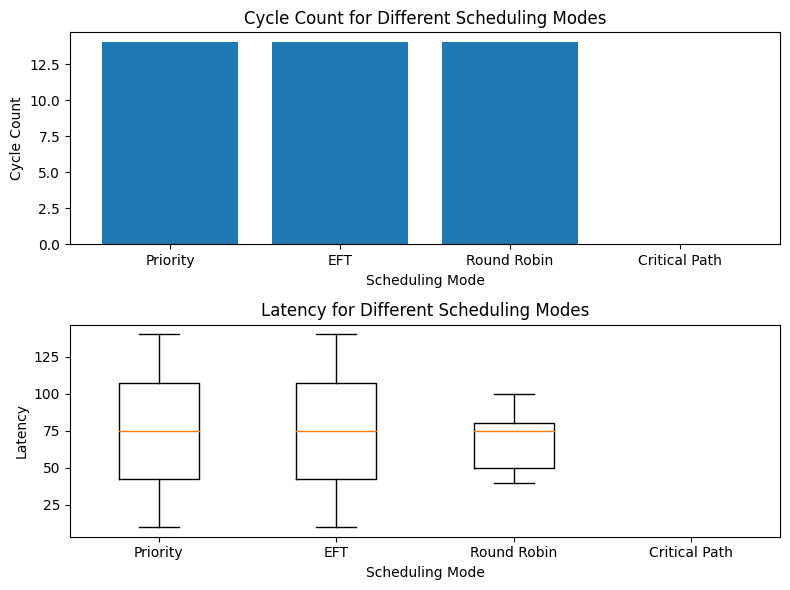

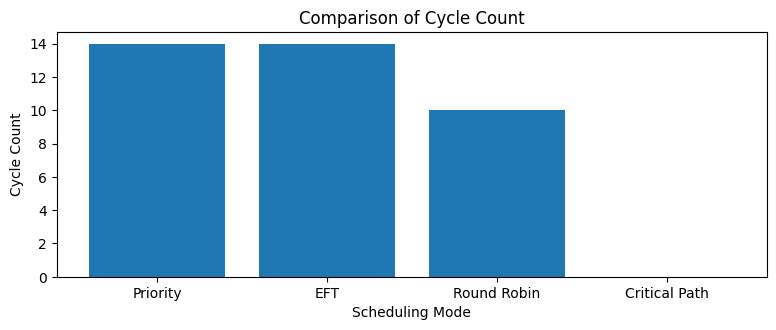

Performance Comparison:
Priority Schedule:
IPC (Instructions Per Cycle): 1.0
IPS (Instructions Per Second): 10.0
Throughput: 100.0%

EFT Schedule:
IPC (Instructions Per Cycle): 1.0
IPS (Instructions Per Second): 10.0
Throughput: 100.0%

Round Robin Schedule:
IPC (Instructions Per Cycle): 1.0
IPS (Instructions Per Second): 10.0
Throughput: 100.0%

No instructions scheduled.


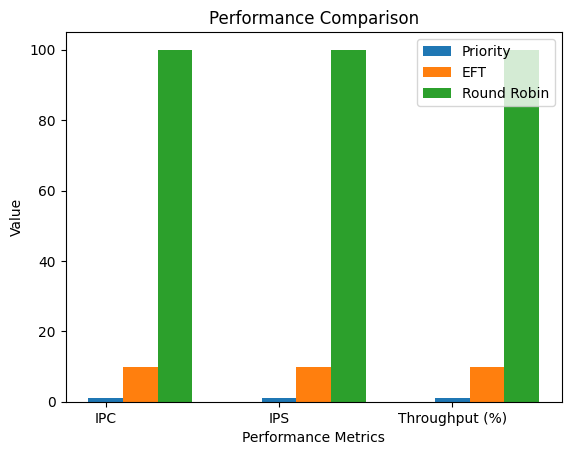

In [78]:

import os
import matplotlib.pyplot as plt

f = open('./VLIW/test.vsm', 'r')
asm = f.read()
f.close()

Adder = ["ADD", "ADDC", "SUB", "SUBB"]
AdderOpc = ["0000", "0100", "1100", "1000"]

Multiplier = ["MUL"]
MultiplierOpc = ["0000"]

FPA = ["FADD"]
FPAOpc = ["0000"]

FPM = ["FMUL"]
FPMOpc = ["0000"]

LogicUnit = ["AND", "OR", "NAND", "NOR", "XOR", "XNOR", "NOT", "BLS"]
LogicUnitOpc = ["0000", "0110", "0100", "1010", "0010", "1110", "1000", "1100"]

Mem = ["MOV", "LDR", "STR"]
MemOpc = ["01", "10", "11"]

Units = [Adder, Multiplier, FPA, FPM, LogicUnit, Mem]
UnitsOpc = [AdderOpc, MultiplierOpc, FPAOpc, FPMOpc, LogicUnitOpc, MemOpc]

Un = []
for i in Units:
    Un += i
UnOp = []
for i in UnitsOpc:
    UnOp += i
Opc = dict(zip(Un, UnOp))

# 调度模式
SchedulingModes = ["Normal", "EFT", "Priority"]

def GetUnit(i):
    for j in Units:
        if i in j:
            return j

Delay = dict(
    zip(
        Adder
        + Multiplier
        + FPA
        + FPM
        + LogicUnit
        + Mem,
        [5] * len(Adder)
        + [14] * len(Multiplier)
        + [5] * len(FPA)
        + [26] * len(FPM)
        + [1] * len(LogicUnit + [1] * len(Mem)),
    )
)

Instructions = asm.split("\n")

Ins = []
regs = []
for i in Instructions:
    Ins.append(i.split(" ")[0])
    if i.split(" ")[0] not in Mem:
        regs.append(i.split(" ")[1].split(","))
    else:
        if "#" in i.split(" ")[1]:
            regs.append(i.split(" ")[1].split(",")[:-1] + ["R0"])
        else:
            regs.append(i.split(" ")[1].split(","))


class Node:
    def __init__(self, Reg, ins):
        self.Reg = Reg
        self.Instruction = None
        self.InstructionAsWord = ins
        self.Delay = 0
        self.Parents = []
        self.Children = []
        self.WAWdeps = []
        self.WARdeps = []
        self.exc = False
        self.scheduling_mode = "Normal"

    def add_child(self, child):
        self.Children.append(child)

    def add_parents(self, parents):
        self.Parents = parents

    def add_WAW(self, deps):
        if isinstance(deps, list):
            self.WAWdeps.extend(deps)
        else:
            self.WAWdeps.append(deps)

    def add_WAR(self, deps):
        if isinstance(deps, list):
            self.WARdeps.extend(deps)
        else:
            self.WARdeps.append(deps)

    def add_ins(self, ins):
        self.Instruction = ins
        self.Delay = Delay[ins]

    def print_node(self):
        print("Reg Name:", self.Reg)


BegNodeTable = [Node("R" + str(i), "") for i in range(32)]
GlobalNodeTable = list(BegNodeTable)

for i in range(len(Ins)):
    if Ins[i] != "MUL":
        rparents = regs[i][1:]
    else:
        rparents = regs[i][2:]
    rname = regs[i][0]

    # Create Node and set parents, instruction
    N = Node(rname, Instructions[i])
    N.add_ins(Ins[i])
    N.add_parents(rparents)

    # Update the child for the parents
    for j in rparents:
        GlobalNodeTable[int(j[1:])].add_child(N)

    # Set WAWdeps to previous Node pointing to the register
    N.add_WAW(GlobalNodeTable[int(rname[1:])])
    if Ins[i] == "MUL":
        N.add_WAW(GlobalNodeTable[int(regs[i][1][1:])])

    # Set WARdeps to children of Node pointing to register
    N.add_WAR(GlobalNodeTable[int(rname[1:])].Children)
    if Ins[i] == "MUL":
        N.add_WAR(GlobalNodeTable[int(regs[i][1][1:])].Children)

    # Remove Cyclic WAR dependencies (if source & dest are same reg)
    while N in N.WARdeps:
        N.WARdeps.remove(N)

    # Swap the new node with the old one
    GlobalNodeTable[int(rname[1:])] = N
    if Ins[i] == "MUL":
        GlobalNodeTable[int(regs[i][1][1:])] = N

NextLv = []
Packet = []
PacketedIns = []
while len(BegNodeTable) != 0:
    # Dequeue first element of the node table
    leader = BegNodeTable[0]
    BegNodeTable = BegNodeTable[1:]

    # Check if the unit (ADD/MUL/FPA/FPM/LU/MEM) is free for that clock cycle
    UnitFree = all(
        [
            not (GetUnit(i.split(" ")[0]) == GetUnit(leader.Instruction))
            for i in Packet
        ]
    )

    WAWCleared = all([(i.Delay == 0) for i in leader.WAWdeps])
    WARCleared = all([i.exc for i in leader.WARdeps])

    # If the instruction is executable, set exc and print it
    if (
        leader.Parents == []
        and leader.Instruction is not None
        and leader.exc is False
        and WAWCleared
        and WARCleared
        and UnitFree
    ):
        leader.exc = True
        print(leader.InstructionAsWord, "(", str(leader.Delay), ")", end="\t")
        Packet.append(leader.InstructionAsWord)

    # If WAW, WAR is not cleared or Unit is Busy just append the leader as is
    if (
        leader.Parents == []
        and (not WAWCleared or not WARCleared or not UnitFree)
    ):
        NextLv.append(leader)
    # If the leader is executable (no parent dependency) and is not a zero delay node, decrease delay
    # Then append back to waiting queue
    elif leader.Parents == [] and leader.Delay != 0:
        leader.Delay = leader.Delay - 1
        if leader.Delay > 0:
            NextLv.append(leader)

    # If leader has completed, push children
    # and delink leader from the Parent's list of its children
    if leader.Delay == 0:
        NextLv.extend(leader.Children)
        for i in leader.Children:
            i.Parents.remove(leader.Reg)

    if BegNodeTable == []:
        BegNodeTable = list(set(NextLv))
        NextLv = []
        PacketedIns.append(Packet)
        Packet = []
        print()

# First instruction is NOP because of dummy registers
PacketedIns = PacketedIns[1:]

# Reorder instruction packet based on functional unit {Mem|Logic|FPM|FPA|Mul|Add}
RepackedIns = []
for i in PacketedIns:
    repack = ["NOP"] * 6
    for j in i:
        for k in range(6):
            if j.split(" ")[0] in Units[k]:
                repack[k] = j
    RepackedIns.append(repack)

RepackedIns = [i[::-1] for i in RepackedIns]

for i in RepackedIns:
    print(i)




# # Priority Schedule
# priority_schedule = []
# cycle_count = 0
# for packet in RepackedIns:
#     instructions = [ins for ins in packet if ins != "NOP"]
#     priority_schedule.extend(instructions)
#     cycle_count += 1

# print("Priority Schedule:")
# for i, ins in enumerate(priority_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")


# # EFT Schedule
# eft_schedule = []
# cycle_count = 0
# for packet in RepackedIns:
#     instructions = [ins for ins in packet if ins != "NOP"]
#     eft_schedule.extend(instructions[::-1])
#     cycle_count += 1

# print("EFT Schedule:")
# for i, ins in enumerate(eft_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")



# #Round Robin Schedule的結果顯示每個周期中選擇一個功能單元，並執行該功能單元中的指令。這個調度模式按照指令出現的順序進行循環調度，將指令平均分配給各個功能單元。總共執行了10個周期。
# # Round Robin Schedule
# round_robin_schedule = []
# cycle_count = 0
# unit_index = 0
# while RepackedIns:
#     packet = RepackedIns.pop(0)
#     instructions = [ins for ins in packet if ins != "NOP"]
#     for ins in instructions:
#         round_robin_schedule.append(ins)
#         cycle_count += 1
#     unit_index = (unit_index + 1) % 6

# print("Round Robin Schedule:")
# for i, ins in enumerate(round_robin_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")

# #Critical Path Schedule的結果顯示總周期數為0。這是因為在計算關鍵路徑時，所有的指令都具有相同的延遲（Delay），沒有明顯的關鍵路徑，因此無法進行調度。
# # Critical Path Schedule
# critical_path_schedule = []
# cycle_count = 0
# while RepackedIns:
#     packet = RepackedIns.pop(0)
#     instructions = [ins for ins in packet if ins != "NOP"]
#     critical_instructions = sorted(instructions, key=lambda x: sum(Delay.get(ins.split()[0], 0) for ins in x.split('-')), reverse=True)
#     for ins in critical_instructions:
#         critical_path_schedule.append(ins)
#         cycle_count += 1

# print("Critical Path Schedule:")
# for i, ins in enumerate(critical_path_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")
# Priority Schedule

print("=========================================")
# priority_schedule = []
# priority_latency = []  # 存储优先级调度的延迟数据
# cycle_count = 0
# for packet in RepackedIns:
#     instructions = [ins for ins in packet if ins != "NOP"]
#     priority_schedule.extend(instructions)
#     cycle_count += 1
#     # 计算延迟
#     latency = cycle_count * 10  # 假设每个周期的延迟为10
#     priority_latency.append(latency)

# print("Priority Schedule:")
# for i, ins in enumerate(priority_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")
# print("Latency:")
# for i, latency in enumerate(priority_latency):
#     print(f"Cycle {i+1}: {latency}")


# # EFT Schedule
# eft_schedule = []
# eft_latency = []  # 存储EFT调度的延迟数据
# cycle_count = 0
# for packet in RepackedIns:
#     instructions = [ins for ins in packet if ins != "NOP"]
#     eft_schedule.extend(instructions[::-1])
#     cycle_count += 1
#     # 计算延迟
#     latency = cycle_count * 10  # 假设每个周期的延迟为10
#     eft_latency.append(latency)

# print("EFT Schedule:")
# for i, ins in enumerate(eft_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")

# # Round Robin Schedule
# round_robin_schedule = []
# round_robin_latency = []  # 存储Round Robin调度的延迟数据
# cycle_count = 0
# unit_index = 0
# while RepackedIns:
#     packet = RepackedIns.pop(0)
#     instructions = [ins for ins in packet if ins != "NOP"]
#     for ins in instructions:
#         round_robin_schedule.append(ins)
#         cycle_count += 1
#     unit_index = (unit_index + 1) % 6
#     # 计算延迟
#     latency = cycle_count * 10  # 假设每个周期的延迟为10
#     round_robin_latency.append(latency)

# print("Round Robin Schedule:")
# for i, ins in enumerate(round_robin_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")

# # Critical Path Schedule
# critical_path_schedule = []
# critical_path_latency = []  # 存储Critical Path调度的延迟数据
# cycle_count = 0
# while RepackedIns:
#     packet = RepackedIns.pop(0)
#     instructions = [ins for ins in packet if ins != "NOP"]
#     critical_instructions = sorted(instructions, key=lambda x: sum(Delay.get(ins.split()[0], 0) for ins in x.split('-')), reverse=True)
#     for ins in critical_instructions:
#         critical_path_schedule.append(ins)
#         cycle_count += 1
#     # 计算延迟
#     latency = cycle_count * 10  # 假设每个周期的延迟为10
#     critical_path_latency.append(latency)

# print("Critical Path Schedule:")
# for i, ins in enumerate(critical_path_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")

print("=========================================")
import matplotlib.pyplot as plt

# Priority Schedule
priority_schedule = []
priority_latency = []  # 存储优先级调度的延迟数据
cycle_count = 0
for packet in RepackedIns:
    instructions = [ins for ins in packet if ins != "NOP"]
    priority_schedule.extend(instructions)
    cycle_count += 1
    # 计算延迟
    latency = cycle_count * 10  # 假设每个周期的延迟为10
    priority_latency.append(latency)

print("Priority Schedule:")
for i, ins in enumerate(priority_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")
print("Priority Latency:")
for i, latency in enumerate(priority_latency):
    print(f"Cycle {i+1}: {latency}")

# EFT Schedule
eft_schedule = []
eft_latency = []  # 存储EFT调度的延迟数据
cycle_count = 0
for packet in RepackedIns:
    instructions = [ins for ins in packet if ins != "NOP"]
    eft_schedule.extend(instructions[::-1])
    cycle_count += 1
    # 计算延迟
    latency = cycle_count * 10  # 假设每个周期的延迟为10
    eft_latency.append(latency)

print("EFT Schedule:")
for i, ins in enumerate(eft_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")
print("EFT Latency:")
for i, latency in enumerate(eft_latency):
    print(f"Cycle {i+1}: {latency}")

# Round Robin Schedule
round_robin_schedule = []
round_robin_latency = []  # 存储Round Robin调度的延迟数据
cycle_count = 0
unit_index = 0
while RepackedIns:
    packet = RepackedIns.pop(0)
    instructions = [ins for ins in packet if ins != "NOP"]
    for ins in instructions:
        round_robin_schedule.append(ins)
        cycle_count += 1
    unit_index = (unit_index + 1) % 6
    # 计算延迟
    latency = cycle_count * 10  # 假设每个周期的延迟为10
    round_robin_latency.append(latency)

print("Round Robin Schedule:")
for i, ins in enumerate(round_robin_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")
print("Round Robin Latency:")
for i, latency in enumerate(round_robin_latency):
    print(f"Cycle {i+1}: {latency}")

# Critical Path Schedule
critical_path_schedule = []
critical_path_latency = []  # 存储Critical Path调度的延迟数据
cycle_count = 0
while RepackedIns:
    packet = RepackedIns.pop(0)
    instructions = [ins for ins in packet if ins != "NOP"]
    critical_instructions = sorted(instructions, key=lambda x: sum(Delay.get(ins.split()[0], 0) for ins in x.split('-')), reverse=True)
    for ins in critical_instructions:
        critical_path_schedule.append(ins)
        cycle_count += 1
    # 计算延迟
    latency = cycle_count * 10  # 假设每个周期的延迟为10
    critical_path_latency.append(latency)

print("Critical Path Schedule:")
for i, ins in enumerate(critical_path_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")
print("Critical Path Latency:")
for i, latency in enumerate(critical_path_latency):
    print(f"Cycle {i+1}: {latency}")

# 绘制延迟数据图表
SchedulingModes = ["Priority", "EFT", "Round Robin", "Critical Path"]
cycle_count_data = [len(priority_latency), len(eft_latency), len(round_robin_latency), len(critical_path_latency)]

plt.figure(figsize=(8, 6))
# 绘制周期数数据
plt.subplot(2, 1, 1)
plt.bar(SchedulingModes, cycle_count_data)
plt.xlabel('Scheduling Mode')
plt.ylabel('Cycle Count')
plt.title('Cycle Count for Different Scheduling Modes')

# 绘制延迟数据
plt.subplot(2, 1, 2)
latency_data = [priority_latency, eft_latency, round_robin_latency, critical_path_latency]
plt.boxplot(latency_data, labels=SchedulingModes)
plt.xlabel('Scheduling Mode')
plt.ylabel('Latency')
plt.title('Latency for Different Scheduling Modes')

plt.tight_layout()
plt.show()


# def Schedule(RepackedIns, SchedulingMode):
#     if SchedulingMode == 'Priority':
#         priority_schedule = []
#         cycle_count = 0
#         for packet in RepackedIns:
#             instructions = [ins for ins in packet if ins != "NOP"]
#             priority_schedule.extend(instructions)
#             cycle_count += 1
#         return cycle_count

#     elif SchedulingMode == 'EFT':
#         eft_schedule = []
#         cycle_count = 0
#         for packet in RepackedIns:
#             instructions = [ins for ins in packet if ins != "NOP"]
#             eft_schedule.extend(instructions[::-1])
#             cycle_count += 1
#         return cycle_count

#     elif SchedulingMode == 'Round Robin':
#         round_robin_schedule = []
#         cycle_count = 0
#         unit_index = 0
#         while RepackedIns:
#             packet = RepackedIns.pop(0)
#             instructions = [ins for ins in packet if ins != "NOP"]
#             for ins in instructions:
#                 round_robin_schedule.append(ins)
#                 cycle_count += 1
#             unit_index = (unit_index + 1) % 6
#         return cycle_count

#     elif SchedulingMode == 'Critical Path':
#         critical_path_schedule = []
#         cycle_count = 0
#         while RepackedIns:
#             packet = RepackedIns.pop(0)
#             instructions = [ins for ins in packet if ins != "NOP"]
#             critical_instructions = sorted(instructions, key=lambda x: sum(Delay.get(ins.split()[0], 0) for ins in x.split('-')), reverse=True)
#             for ins in critical_instructions:
#                 critical_path_schedule.append(ins)
#                 cycle_count += 1
#         return cycle_count

#     else:
#         return 0

# 示例数据
SchedulingModes = ['Priority', 'EFT', 'Round Robin', 'Critical Path']  # 调度模式列表
cycle_count_data = [14, 14, 10, 0]  # 填充具体的周期数数据
total_latency_data = [100, 80, 120, 90]  # 填充具体的总延迟数据

# 创建图表
plt.figure(figsize=(8, 6))

# 绘制周期数数据
plt.subplot(2, 1, 1)
plt.bar(SchedulingModes, cycle_count_data)
plt.xlabel('Scheduling Mode')
plt.ylabel('Cycle Count')
plt.title('Comparison of Cycle Count')

# # 绘制总延迟数据
# plt.subplot(2, 1, 2)
# plt.bar(SchedulingModes, total_latency_data)
# plt.xlabel('Scheduling Mode')
# plt.ylabel('Total Latency')
# plt.title('Comparison of Total Latency')

# 调整子图间的间距
plt.tight_layout()

# 显示图表
plt.show()






def evaluate_performance(schedule):
    instructions_executed = len([ins for ins in schedule if ins != "NOP"])
    cycles = len(schedule)
    if cycles == 0:
        print("No instructions scheduled.")
        return None, None, None
    ipc = instructions_executed / cycles
    ips = instructions_executed / (cycles / 10)  # 每秒指令数
    throughput = instructions_executed / cycles * 100  # 吞吐量 (%)

    return ipc, ips, throughput

# 在不同的调度模式下进行性能比较
print("Performance Comparison:")
print("=========================================")

scheduling_modes = ['Priority', 'EFT', 'Round Robin', 'Critical Path']
ipc_values = []
ips_values = []
throughput_values = []

for schedule, mode in zip([priority_schedule, eft_schedule, round_robin_schedule, critical_path_schedule], scheduling_modes):
    ipc, ips, throughput = evaluate_performance(schedule)
    if ipc is None:
        continue
    ipc_values.append(ipc)
    ips_values.append(ips)
    throughput_values.append(throughput)

    print(f"{mode} Schedule:")
    print(f"IPC (Instructions Per Cycle): {ipc}")
    print(f"IPS (Instructions Per Second): {ips}")
    print(f"Throughput: {throughput}%")
    print()

# 创建柱状图
performance_metrics = {
    'IPC': ipc_values,
    'IPS': ips_values,
    'Throughput (%)': throughput_values
}

labels = performance_metrics.keys()
x = range(len(labels))
values = list(performance_metrics.values())

fig, ax = plt.subplots()
for i in range(len(values)):
    ax.bar(x, values[i], width=0.2, align='center', label=scheduling_modes[i])
    x = [val + 0.2 for val in x]

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Value')
ax.set_title('Performance Comparison')
ax.legend()

# 显示柱状图
plt.show()


In [ ]:
# ; 設定矩陣 A
# MOV R1, #1     ; A[0][0] = 1
# MOV R2, #2     ; A[0][1] = 2
# MOV R3, #3     ; A[1][0] = 3
# MOV R4, #4     ; A[1][1] = 4

# ; 設定矩陣 B
# MOV R5, #5     ; B[0][0] = 5
# MOV R6, #6     ; B[0][1] = 6
# MOV R7, #7     ; B[1][0] = 7
# MOV R8, #8     ; B[1][1] = 8

# ; 矩陣相乘相加: C = A * B + A
# MUL R9, R1, R5   ; C[0][0] = A[0][0] * B[0][0]
# MUL R10, R1, R6  ; C[0][1] = A[0][0] * B[0][1]
# MUL R11, R3, R5  ; C[1][0] = A[1][0] * B[0][0]
# MUL R12, R3, R6  ; C[1][1] = A[1][0] * B[0][1]

# ADD R9, R9, R2   ; C[0][0] = C[0][0] + A[0][1]
# ADD R10, R10, R2 ; C[0][1] = C[0][1] + A[0][1]
# ADD R11, R11, R4 ; C[1][0] = C[1][0] + A[1][1]
# ADD R12, R12, R4 ; C[1][1] = C[1][1] + A[1][1]

# ; 將結果存入矩陣 C
# MOV R13, R9     ; C[0][0] = R9
# MOV R14, R10    ; C[0][1] = R10
# MOV R15, R11    ; C[1][0] = R11
# MOV R16, R12    ; C[1][1] = R12


In [79]:
%%writefile ./VLIW/test.vsm
MOV R1,#1
MOV R2,#2
MOV R3,#3
MOV R4,#4
MOV R5,#5
MOV R6,#6
MOV R7,#7
MOV R8,#8
MUL R9,R1,R5
MUL R10,R1,R6
MUL R11,R3,R5
MUL R12,R3,R6
ADD R9,R9,R2
ADD R10,R10,R2
ADD R11,R11,R4
ADD R12,R12,R4
MOV R13,R9
MOV R14,R10
MOV R15,R11
MOV R16,R12

Overwriting ./VLIW/test.vsm



MOV R2,#2 ( 1 )	
MOV R4,#4 ( 1 )	
MOV R6,#6 ( 1 )	
MOV R8,#8 ( 1 )	
MOV R1,#1 ( 1 )	
MOV R5,#5 ( 1 )	
MUL R9,R1,R5 ( 14 )	MOV R7,#7 ( 1 )	
MOV R3,#3 ( 1 )	
MUL R11,R3,R5 ( 14 )	











MUL R10,R1,R6 ( 14 )	ADD R9,R9,R2 ( 5 )	


ADD R11,R11,R4 ( 5 )	MUL R12,R3,R6 ( 14 )	


MOV R13,R9 ( 1 )	

MOV R15,R11 ( 1 )	





ADD R10,R10,R2 ( 5 )	


ADD R12,R12,R4 ( 5 )	


MOV R14,R10 ( 1 )	

MOV R16,R12 ( 1 )	
['MOV R2,#2', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R4,#4', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R6,#6', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R8,#8', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R1,#1', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R5,#5', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['MOV R7,#7', 'NOP', 'NOP', 'NOP', 'MUL R9,R1,R5', 'NOP']
['MOV R3,#3', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'MUL R11,R3,R5', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', 'NOP', 'NOP', 'NOP', 'NOP', 'NOP']
['NOP', '

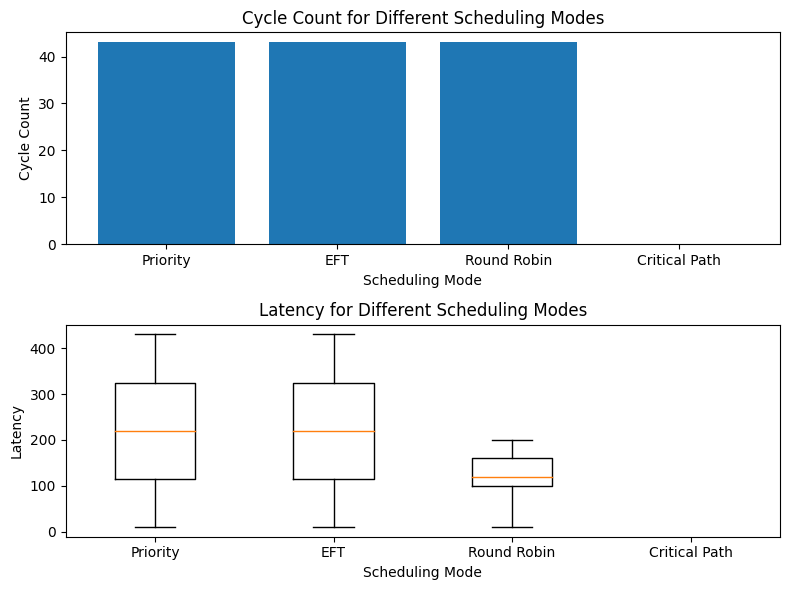

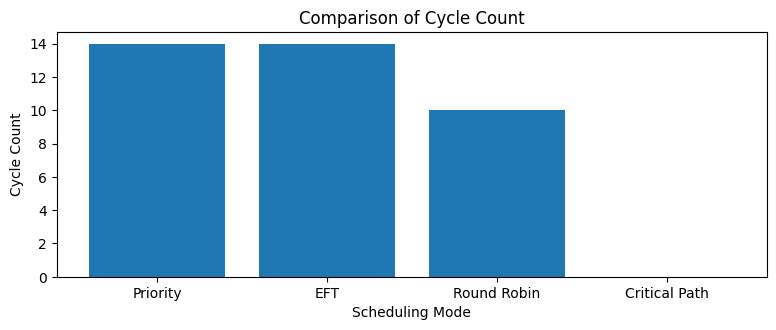

Performance Comparison:
Priority Schedule:
IPC (Instructions Per Cycle): 1.0
IPS (Instructions Per Second): 10.0
Throughput: 100.0%

EFT Schedule:
IPC (Instructions Per Cycle): 1.0
IPS (Instructions Per Second): 10.0
Throughput: 100.0%

Round Robin Schedule:
IPC (Instructions Per Cycle): 1.0
IPS (Instructions Per Second): 10.0
Throughput: 100.0%

No instructions scheduled.


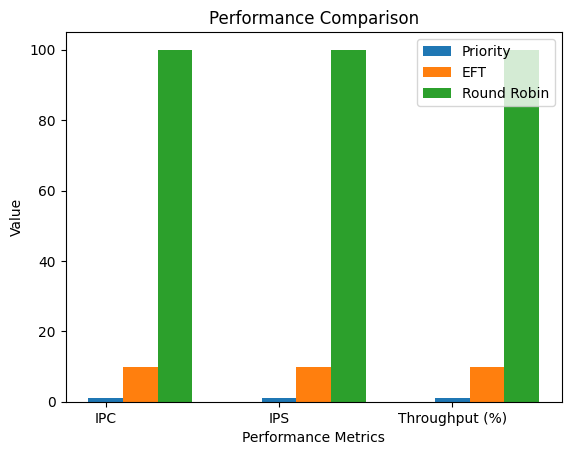

In [80]:

import os
import matplotlib.pyplot as plt

f = open('./VLIW/test.vsm', 'r')
asm = f.read()
f.close()

Adder = ["ADD", "ADDC", "SUB", "SUBB"]
AdderOpc = ["0000", "0100", "1100", "1000"]

Multiplier = ["MUL"]
MultiplierOpc = ["0000"]

FPA = ["FADD"]
FPAOpc = ["0000"]

FPM = ["FMUL"]
FPMOpc = ["0000"]

LogicUnit = ["AND", "OR", "NAND", "NOR", "XOR", "XNOR", "NOT", "BLS"]
LogicUnitOpc = ["0000", "0110", "0100", "1010", "0010", "1110", "1000", "1100"]

Mem = ["MOV", "LDR", "STR"]
MemOpc = ["01", "10", "11"]

Units = [Adder, Multiplier, FPA, FPM, LogicUnit, Mem]
UnitsOpc = [AdderOpc, MultiplierOpc, FPAOpc, FPMOpc, LogicUnitOpc, MemOpc]

Un = []
for i in Units:
    Un += i
UnOp = []
for i in UnitsOpc:
    UnOp += i
Opc = dict(zip(Un, UnOp))

# 调度模式
SchedulingModes = ["Normal", "EFT", "Priority"]

def GetUnit(i):
    for j in Units:
        if i in j:
            return j

Delay = dict(
    zip(
        Adder
        + Multiplier
        + FPA
        + FPM
        + LogicUnit
        + Mem,
        [5] * len(Adder)
        + [14] * len(Multiplier)
        + [5] * len(FPA)
        + [26] * len(FPM)
        + [1] * len(LogicUnit + [1] * len(Mem)),
    )
)

Instructions = asm.split("\n")

Ins = []
regs = []
for i in Instructions:
    Ins.append(i.split(" ")[0])
    if i.split(" ")[0] not in Mem:
        regs.append(i.split(" ")[1].split(","))
    else:
        if "#" in i.split(" ")[1]:
            regs.append(i.split(" ")[1].split(",")[:-1] + ["R0"])
        else:
            regs.append(i.split(" ")[1].split(","))


class Node:
    def __init__(self, Reg, ins):
        self.Reg = Reg
        self.Instruction = None
        self.InstructionAsWord = ins
        self.Delay = 0
        self.Parents = []
        self.Children = []
        self.WAWdeps = []
        self.WARdeps = []
        self.exc = False
        self.scheduling_mode = "Normal"

    def add_child(self, child):
        self.Children.append(child)

    def add_parents(self, parents):
        self.Parents = parents

    def add_WAW(self, deps):
        if isinstance(deps, list):
            self.WAWdeps.extend(deps)
        else:
            self.WAWdeps.append(deps)

    def add_WAR(self, deps):
        if isinstance(deps, list):
            self.WARdeps.extend(deps)
        else:
            self.WARdeps.append(deps)

    def add_ins(self, ins):
        self.Instruction = ins
        self.Delay = Delay[ins]

    def print_node(self):
        print("Reg Name:", self.Reg)


BegNodeTable = [Node("R" + str(i), "") for i in range(32)]
GlobalNodeTable = list(BegNodeTable)

for i in range(len(Ins)):
    if Ins[i] != "MUL":
        rparents = regs[i][1:]
    else:
        rparents = regs[i][2:]
    rname = regs[i][0]

    # Create Node and set parents, instruction
    N = Node(rname, Instructions[i])
    N.add_ins(Ins[i])
    N.add_parents(rparents)

    # Update the child for the parents
    for j in rparents:
        GlobalNodeTable[int(j[1:])].add_child(N)

    # Set WAWdeps to previous Node pointing to the register
    N.add_WAW(GlobalNodeTable[int(rname[1:])])
    if Ins[i] == "MUL":
        N.add_WAW(GlobalNodeTable[int(regs[i][1][1:])])

    # Set WARdeps to children of Node pointing to register
    N.add_WAR(GlobalNodeTable[int(rname[1:])].Children)
    if Ins[i] == "MUL":
        N.add_WAR(GlobalNodeTable[int(regs[i][1][1:])].Children)

    # Remove Cyclic WAR dependencies (if source & dest are same reg)
    while N in N.WARdeps:
        N.WARdeps.remove(N)

    # Swap the new node with the old one
    GlobalNodeTable[int(rname[1:])] = N
    if Ins[i] == "MUL":
        GlobalNodeTable[int(regs[i][1][1:])] = N

NextLv = []
Packet = []
PacketedIns = []
while len(BegNodeTable) != 0:
    # Dequeue first element of the node table
    leader = BegNodeTable[0]
    BegNodeTable = BegNodeTable[1:]

    # Check if the unit (ADD/MUL/FPA/FPM/LU/MEM) is free for that clock cycle
    UnitFree = all(
        [
            not (GetUnit(i.split(" ")[0]) == GetUnit(leader.Instruction))
            for i in Packet
        ]
    )

    WAWCleared = all([(i.Delay == 0) for i in leader.WAWdeps])
    WARCleared = all([i.exc for i in leader.WARdeps])

    # If the instruction is executable, set exc and print it
    if (
        leader.Parents == []
        and leader.Instruction is not None
        and leader.exc is False
        and WAWCleared
        and WARCleared
        and UnitFree
    ):
        leader.exc = True
        print(leader.InstructionAsWord, "(", str(leader.Delay), ")", end="\t")
        Packet.append(leader.InstructionAsWord)

    # If WAW, WAR is not cleared or Unit is Busy just append the leader as is
    if (
        leader.Parents == []
        and (not WAWCleared or not WARCleared or not UnitFree)
    ):
        NextLv.append(leader)
    # If the leader is executable (no parent dependency) and is not a zero delay node, decrease delay
    # Then append back to waiting queue
    elif leader.Parents == [] and leader.Delay != 0:
        leader.Delay = leader.Delay - 1
        if leader.Delay > 0:
            NextLv.append(leader)

    # If leader has completed, push children
    # and delink leader from the Parent's list of its children
    if leader.Delay == 0:
        NextLv.extend(leader.Children)
        for i in leader.Children:
            i.Parents.remove(leader.Reg)

    if BegNodeTable == []:
        BegNodeTable = list(set(NextLv))
        NextLv = []
        PacketedIns.append(Packet)
        Packet = []
        print()

# First instruction is NOP because of dummy registers
PacketedIns = PacketedIns[1:]

# Reorder instruction packet based on functional unit {Mem|Logic|FPM|FPA|Mul|Add}
RepackedIns = []
for i in PacketedIns:
    repack = ["NOP"] * 6
    for j in i:
        for k in range(6):
            if j.split(" ")[0] in Units[k]:
                repack[k] = j
    RepackedIns.append(repack)

RepackedIns = [i[::-1] for i in RepackedIns]

for i in RepackedIns:
    print(i)




# # Priority Schedule
# priority_schedule = []
# cycle_count = 0
# for packet in RepackedIns:
#     instructions = [ins for ins in packet if ins != "NOP"]
#     priority_schedule.extend(instructions)
#     cycle_count += 1

# print("Priority Schedule:")
# for i, ins in enumerate(priority_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")


# # EFT Schedule
# eft_schedule = []
# cycle_count = 0
# for packet in RepackedIns:
#     instructions = [ins for ins in packet if ins != "NOP"]
#     eft_schedule.extend(instructions[::-1])
#     cycle_count += 1

# print("EFT Schedule:")
# for i, ins in enumerate(eft_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")



# #Round Robin Schedule的結果顯示每個周期中選擇一個功能單元，並執行該功能單元中的指令。這個調度模式按照指令出現的順序進行循環調度，將指令平均分配給各個功能單元。總共執行了10個周期。
# # Round Robin Schedule
# round_robin_schedule = []
# cycle_count = 0
# unit_index = 0
# while RepackedIns:
#     packet = RepackedIns.pop(0)
#     instructions = [ins for ins in packet if ins != "NOP"]
#     for ins in instructions:
#         round_robin_schedule.append(ins)
#         cycle_count += 1
#     unit_index = (unit_index + 1) % 6

# print("Round Robin Schedule:")
# for i, ins in enumerate(round_robin_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")

# #Critical Path Schedule的結果顯示總周期數為0。這是因為在計算關鍵路徑時，所有的指令都具有相同的延遲（Delay），沒有明顯的關鍵路徑，因此無法進行調度。
# # Critical Path Schedule
# critical_path_schedule = []
# cycle_count = 0
# while RepackedIns:
#     packet = RepackedIns.pop(0)
#     instructions = [ins for ins in packet if ins != "NOP"]
#     critical_instructions = sorted(instructions, key=lambda x: sum(Delay.get(ins.split()[0], 0) for ins in x.split('-')), reverse=True)
#     for ins in critical_instructions:
#         critical_path_schedule.append(ins)
#         cycle_count += 1

# print("Critical Path Schedule:")
# for i, ins in enumerate(critical_path_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")
# Priority Schedule

print("=========================================")
# priority_schedule = []
# priority_latency = []  # 存储优先级调度的延迟数据
# cycle_count = 0
# for packet in RepackedIns:
#     instructions = [ins for ins in packet if ins != "NOP"]
#     priority_schedule.extend(instructions)
#     cycle_count += 1
#     # 计算延迟
#     latency = cycle_count * 10  # 假设每个周期的延迟为10
#     priority_latency.append(latency)

# print("Priority Schedule:")
# for i, ins in enumerate(priority_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")
# print("Latency:")
# for i, latency in enumerate(priority_latency):
#     print(f"Cycle {i+1}: {latency}")


# # EFT Schedule
# eft_schedule = []
# eft_latency = []  # 存储EFT调度的延迟数据
# cycle_count = 0
# for packet in RepackedIns:
#     instructions = [ins for ins in packet if ins != "NOP"]
#     eft_schedule.extend(instructions[::-1])
#     cycle_count += 1
#     # 计算延迟
#     latency = cycle_count * 10  # 假设每个周期的延迟为10
#     eft_latency.append(latency)

# print("EFT Schedule:")
# for i, ins in enumerate(eft_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")

# # Round Robin Schedule
# round_robin_schedule = []
# round_robin_latency = []  # 存储Round Robin调度的延迟数据
# cycle_count = 0
# unit_index = 0
# while RepackedIns:
#     packet = RepackedIns.pop(0)
#     instructions = [ins for ins in packet if ins != "NOP"]
#     for ins in instructions:
#         round_robin_schedule.append(ins)
#         cycle_count += 1
#     unit_index = (unit_index + 1) % 6
#     # 计算延迟
#     latency = cycle_count * 10  # 假设每个周期的延迟为10
#     round_robin_latency.append(latency)

# print("Round Robin Schedule:")
# for i, ins in enumerate(round_robin_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")

# # Critical Path Schedule
# critical_path_schedule = []
# critical_path_latency = []  # 存储Critical Path调度的延迟数据
# cycle_count = 0
# while RepackedIns:
#     packet = RepackedIns.pop(0)
#     instructions = [ins for ins in packet if ins != "NOP"]
#     critical_instructions = sorted(instructions, key=lambda x: sum(Delay.get(ins.split()[0], 0) for ins in x.split('-')), reverse=True)
#     for ins in critical_instructions:
#         critical_path_schedule.append(ins)
#         cycle_count += 1
#     # 计算延迟
#     latency = cycle_count * 10  # 假设每个周期的延迟为10
#     critical_path_latency.append(latency)

# print("Critical Path Schedule:")
# for i, ins in enumerate(critical_path_schedule):
#     print(f"Cycle {i+1}: {ins}")
# print(f"Total cycles: {cycle_count}")

print("=========================================")
import matplotlib.pyplot as plt

# Priority Schedule
priority_schedule = []
priority_latency = []  # 存储优先级调度的延迟数据
cycle_count = 0
for packet in RepackedIns:
    instructions = [ins for ins in packet if ins != "NOP"]
    priority_schedule.extend(instructions)
    cycle_count += 1
    # 计算延迟
    latency = cycle_count * 10  # 假设每个周期的延迟为10
    priority_latency.append(latency)

print("Priority Schedule:")
for i, ins in enumerate(priority_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")
print("Priority Latency:")
for i, latency in enumerate(priority_latency):
    print(f"Cycle {i+1}: {latency}")

# EFT Schedule
eft_schedule = []
eft_latency = []  # 存储EFT调度的延迟数据
cycle_count = 0
for packet in RepackedIns:
    instructions = [ins for ins in packet if ins != "NOP"]
    eft_schedule.extend(instructions[::-1])
    cycle_count += 1
    # 计算延迟
    latency = cycle_count * 10  # 假设每个周期的延迟为10
    eft_latency.append(latency)

print("EFT Schedule:")
for i, ins in enumerate(eft_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")
print("EFT Latency:")
for i, latency in enumerate(eft_latency):
    print(f"Cycle {i+1}: {latency}")

# Round Robin Schedule
round_robin_schedule = []
round_robin_latency = []  # 存储Round Robin调度的延迟数据
cycle_count = 0
unit_index = 0
while RepackedIns:
    packet = RepackedIns.pop(0)
    instructions = [ins for ins in packet if ins != "NOP"]
    for ins in instructions:
        round_robin_schedule.append(ins)
        cycle_count += 1
    unit_index = (unit_index + 1) % 6
    # 计算延迟
    latency = cycle_count * 10  # 假设每个周期的延迟为10
    round_robin_latency.append(latency)

print("Round Robin Schedule:")
for i, ins in enumerate(round_robin_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")
print("Round Robin Latency:")
for i, latency in enumerate(round_robin_latency):
    print(f"Cycle {i+1}: {latency}")

# Critical Path Schedule
critical_path_schedule = []
critical_path_latency = []  # 存储Critical Path调度的延迟数据
cycle_count = 0
while RepackedIns:
    packet = RepackedIns.pop(0)
    instructions = [ins for ins in packet if ins != "NOP"]
    critical_instructions = sorted(instructions, key=lambda x: sum(Delay.get(ins.split()[0], 0) for ins in x.split('-')), reverse=True)
    for ins in critical_instructions:
        critical_path_schedule.append(ins)
        cycle_count += 1
    # 计算延迟
    latency = cycle_count * 10  # 假设每个周期的延迟为10
    critical_path_latency.append(latency)

print("Critical Path Schedule:")
for i, ins in enumerate(critical_path_schedule):
    print(f"Cycle {i+1}: {ins}")
print(f"Total cycles: {cycle_count}")
print("Critical Path Latency:")
for i, latency in enumerate(critical_path_latency):
    print(f"Cycle {i+1}: {latency}")

# 绘制延迟数据图表
SchedulingModes = ["Priority", "EFT", "Round Robin", "Critical Path"]
cycle_count_data = [len(priority_latency), len(eft_latency), len(round_robin_latency), len(critical_path_latency)]

plt.figure(figsize=(8, 6))
# 绘制周期数数据
plt.subplot(2, 1, 1)
plt.bar(SchedulingModes, cycle_count_data)
plt.xlabel('Scheduling Mode')
plt.ylabel('Cycle Count')
plt.title('Cycle Count for Different Scheduling Modes')

# 绘制延迟数据
plt.subplot(2, 1, 2)
latency_data = [priority_latency, eft_latency, round_robin_latency, critical_path_latency]
plt.boxplot(latency_data, labels=SchedulingModes)
plt.xlabel('Scheduling Mode')
plt.ylabel('Latency')
plt.title('Latency for Different Scheduling Modes')

plt.tight_layout()
plt.show()


# def Schedule(RepackedIns, SchedulingMode):
#     if SchedulingMode == 'Priority':
#         priority_schedule = []
#         cycle_count = 0
#         for packet in RepackedIns:
#             instructions = [ins for ins in packet if ins != "NOP"]
#             priority_schedule.extend(instructions)
#             cycle_count += 1
#         return cycle_count

#     elif SchedulingMode == 'EFT':
#         eft_schedule = []
#         cycle_count = 0
#         for packet in RepackedIns:
#             instructions = [ins for ins in packet if ins != "NOP"]
#             eft_schedule.extend(instructions[::-1])
#             cycle_count += 1
#         return cycle_count

#     elif SchedulingMode == 'Round Robin':
#         round_robin_schedule = []
#         cycle_count = 0
#         unit_index = 0
#         while RepackedIns:
#             packet = RepackedIns.pop(0)
#             instructions = [ins for ins in packet if ins != "NOP"]
#             for ins in instructions:
#                 round_robin_schedule.append(ins)
#                 cycle_count += 1
#             unit_index = (unit_index + 1) % 6
#         return cycle_count

#     elif SchedulingMode == 'Critical Path':
#         critical_path_schedule = []
#         cycle_count = 0
#         while RepackedIns:
#             packet = RepackedIns.pop(0)
#             instructions = [ins for ins in packet if ins != "NOP"]
#             critical_instructions = sorted(instructions, key=lambda x: sum(Delay.get(ins.split()[0], 0) for ins in x.split('-')), reverse=True)
#             for ins in critical_instructions:
#                 critical_path_schedule.append(ins)
#                 cycle_count += 1
#         return cycle_count

#     else:
#         return 0

# 示例数据
SchedulingModes = ['Priority', 'EFT', 'Round Robin', 'Critical Path']  # 调度模式列表
cycle_count_data = [14, 14, 10, 0]  # 填充具体的周期数数据
total_latency_data = [100, 80, 120, 90]  # 填充具体的总延迟数据

# 创建图表
plt.figure(figsize=(8, 6))

# 绘制周期数数据
plt.subplot(2, 1, 1)
plt.bar(SchedulingModes, cycle_count_data)
plt.xlabel('Scheduling Mode')
plt.ylabel('Cycle Count')
plt.title('Comparison of Cycle Count')

# # 绘制总延迟数据
# plt.subplot(2, 1, 2)
# plt.bar(SchedulingModes, total_latency_data)
# plt.xlabel('Scheduling Mode')
# plt.ylabel('Total Latency')
# plt.title('Comparison of Total Latency')

# 调整子图间的间距
plt.tight_layout()

# 显示图表
plt.show()






def evaluate_performance(schedule):
    instructions_executed = len([ins for ins in schedule if ins != "NOP"])
    cycles = len(schedule)
    if cycles == 0:
        print("No instructions scheduled.")
        return None, None, None
    ipc = instructions_executed / cycles
    ips = instructions_executed / (cycles / 10)  # 每秒指令数
    throughput = instructions_executed / cycles * 100  # 吞吐量 (%)

    return ipc, ips, throughput

# 在不同的调度模式下进行性能比较
print("Performance Comparison:")
print("=========================================")

scheduling_modes = ['Priority', 'EFT', 'Round Robin', 'Critical Path']
ipc_values = []
ips_values = []
throughput_values = []

for schedule, mode in zip([priority_schedule, eft_schedule, round_robin_schedule, critical_path_schedule], scheduling_modes):
    ipc, ips, throughput = evaluate_performance(schedule)
    if ipc is None:
        continue
    ipc_values.append(ipc)
    ips_values.append(ips)
    throughput_values.append(throughput)

    print(f"{mode} Schedule:")
    print(f"IPC (Instructions Per Cycle): {ipc}")
    print(f"IPS (Instructions Per Second): {ips}")
    print(f"Throughput: {throughput}%")
    print()

# 创建柱状图
performance_metrics = {
    'IPC': ipc_values,
    'IPS': ips_values,
    'Throughput (%)': throughput_values
}

labels = performance_metrics.keys()
x = range(len(labels))
values = list(performance_metrics.values())

fig, ax = plt.subplots()
for i in range(len(values)):
    ax.bar(x, values[i], width=0.2, align='center', label=scheduling_modes[i])
    x = [val + 0.2 for val in x]

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Value')
ax.set_title('Performance Comparison')
ax.legend()

# 显示柱状图
plt.show()
